## Project for Advanced Data Science course
#### Loay Abdulatif & Sharef Mustafa


### We are investigating the possibility of detecting spam via meta data instead of disclosing the content of the message it self

### The motivation here is ethical , as usual methodologies used in anti spaming will check the contents of the message it self and thus violating people privacy

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## we start with parsing the log of a mail server, as seen below this is a labled data since each row is representing an incoming email and the column 'Type' already classifies the email based on a commercial anti spam system

In [129]:
df = pd.read_csv('maildata.csv', error_bad_lines=False)
df.head(3)

,Date,Msg Id,Client Address,Type,Score,From,To,Subject,Size,Virus Details
0,5/11/2017 15:29,iJ1kYuEy-K0f,98.139.213.152,Clean,0.340,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,NaN
1,5/11/2017 11:59,wXfZtBvH8F7S,98.139.213.148,Clean,-1.918,NaN,######@targetdomain.com,Delivery failure,5204,NaN
2,5/11/2017 15:15,POvVNhEZbKTS,98.138.121.119,Clean,-2.089,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,NaN


### pepare the data for modeling, "Client Address" text column will be replaced by 4 numerical
### columns representing the 4 octets of the IP address

In [130]:
b1 = []
b2 = []
b3 = []
b4 = []

for i in df['Client Address']:
    ip = str(i).split('.')
    b1.append(ip[0])
    b2.append(ip[1])
    b3.append(ip[2])
    b4.append(ip[3])
    

df['b1'] = pd.Series(b1)
df['b2'] = pd.Series(b2)
df['b3'] = pd.Series(b3)
df['b4'] = pd.Series(b4)

df.drop('Client Address',1, inplace=True)

### replace Date column with a numerical column of index numbers 

In [131]:
df['Index'] = np.arange(len(df))
df.drop('Date',1, inplace=True)


### drop irrelavent columns , also dropping 'Score' to avoid any correlation from it with the output

In [132]:
df.drop('Virus Details',1, inplace=True)
df.drop('Msg Id',1, inplace=True)
df.dropna()

df.drop('Score',1, inplace=True)

df.head(3)

,Type,From,To,Subject,Size,b1,b2,b3,b4,Index
0,Clean,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,98,139,213,152,0
1,Clean,NaN,######@targetdomain.com,Delivery failure,5204,98,139,213,148,1
2,Clean,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,98,138,121,119,2


### prepare the target column 'Spam' by replacing text values with 0|1 representing Ham|Spam respectivly
### drop 'Type' column afterwarsd


In [133]:
df['Spam'] = pd.Series( [ 0 if(str(i)=='Clean' or str(i)=='Whitelisted') else 1 for i in df['Type'] ])
df.drop('Type',1, inplace=True) 
df.head(15)

,From,To,Subject,Size,b1,b2,b3,b4,Index,Spam
0,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,98,139,213,152,0,0
1,NaN,######@targetdomain.com,Delivery failure,5204,98,139,213,148,1,0
2,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,98,138,121,119,2,0
3,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4397,98,138,121,119,3,0
4,XXXXXXX@yahoo.com,######@targetdomain.com,Re: رسالة قائمة المهنية,11114,98,136,218,253,4,0
5,abx_red@yahoo.com,######@targetdomain.com,Fw: الموقع الالكتروني,5756,98,136,218,212,5,0
6,NaN,######@targetdomain.com,failure notice,3693,98,130,1,219,6,0
7,r351ozh-878z9k-z66yrp-9ryl7n-dkwfya-h-m2-20170...,######@targetdomain.com,NaN,0,96,47,30,71,7,1
8,sp4l07b-fd228w-9553px-kblmum-ru301e-h-m2-20170...,######@targetdomain.com,NaN,0,96,47,30,71,8,1
9,njanbcu-1ouc9c-1009wy-nol7jc-77ae9e-h-m2-20170...,######@targetdomain.com,NaN,0,96,47,30,70,9,1


## from the above we see that some critical columns are still in text and can not be replaced by numerical values, so we will use the numerical features only for now

In [134]:
X = df [['Index', 'Size' ,'b1', 'b2', 'b3', 'b4']]
y = df['Spam']


In [135]:
X.head(2)

,Index,Size,b1,b2,b3,b4
0,0,4331,98,139,213,152
1,1,5204,98,139,213,148


In [136]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Splitting & Fitting

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [138]:
Y = knn.predict(X_test)
accuricy = metrics.accuracy_score(y_test, Y)
print (accuricy)

0.976


### to verify accuracy more precisely, we will use cross validation

In [139]:
from sklearn.cross_validation import cross_val_score

In [140]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )

In [141]:
print(scores)

[ 0.9800995   0.98507463  0.85572139  1.          0.995       0.995
  0.99497487  1.          0.98492462  0.90954774]


In [142]:
print (scores.mean())

0.970034275857


In [143]:
kscores = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )
    kscores.append(scores.mean())
print(kscores)

[0.94647874946873678, 0.97103678841971042, 0.96652668816720411, 0.97254432610815267, 0.9700342758568965, 0.97304683867096675, 0.97304683867096675, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213]


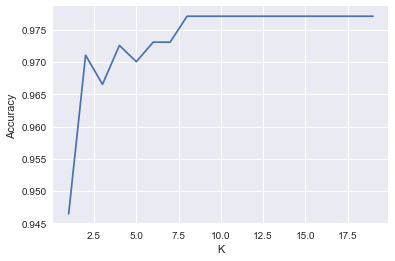

In [144]:
plt.plot(range(1,20) , kscores)
plt.xlabel("K")
plt.ylabel('Accuracy')

 ### we choose the value for k to be 8

### To evaluate the effect of message size on the predection accuracy, we will drop the column 'Size' 
### and test again


[ 0.60199005  0.39800995  0.51741294  0.75124378  0.91        0.82        1.
  0.7839196   0.48743719  0.45226131]
Average score = 0.672227480687


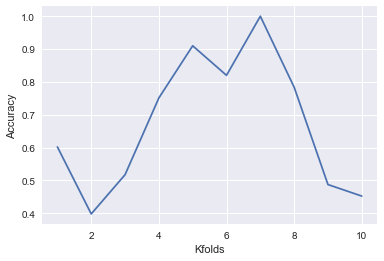

In [145]:
X = df [['Index', 'b1', 'b2', 'b3', 'b4']]
y = df['Spam']

X.head(2)

knn = KNeighborsClassifier(n_neighbors=8)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )
print(scores)
print ("Average score = %s" % scores.mean())

plt.plot(range(1,11) , scores)
plt.xlabel("Kfolds")
plt.ylabel('Accuracy')



### Repeat same step but dropping 'Index' column this time

[ 0.9800995   0.99004975  0.84079602  1.          1.          1.          1.
  1.          1.          0.94472362]
Average score = 0.975566889172


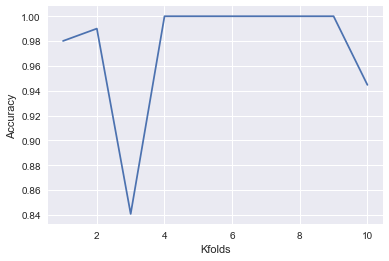

In [146]:
X = df [['Size', 'b1', 'b2', 'b3', 'b4']]
y = df['Spam']

X.head(2)

knn = KNeighborsClassifier(n_neighbors=8)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )
print(scores)
print ("Average score = %s" % scores.mean())

plt.plot(range(1,11) , scores)
plt.xlabel("Kfolds")
plt.ylabel('Accuracy')